In [1]:
import chaospy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = np.linspace(0, 200, 150)
time

array([  0.        ,   1.34228188,   2.68456376,   4.02684564,
         5.36912752,   6.7114094 ,   8.05369128,   9.39597315,
        10.73825503,  12.08053691,  13.42281879,  14.76510067,
        16.10738255,  17.44966443,  18.79194631,  20.13422819,
        21.47651007,  22.81879195,  24.16107383,  25.5033557 ,
        26.84563758,  28.18791946,  29.53020134,  30.87248322,
        32.2147651 ,  33.55704698,  34.89932886,  36.24161074,
        37.58389262,  38.9261745 ,  40.26845638,  41.61073826,
        42.95302013,  44.29530201,  45.63758389,  46.97986577,
        48.32214765,  49.66442953,  51.00671141,  52.34899329,
        53.69127517,  55.03355705,  56.37583893,  57.71812081,
        59.06040268,  60.40268456,  61.74496644,  63.08724832,
        64.4295302 ,  65.77181208,  67.11409396,  68.45637584,
        69.79865772,  71.1409396 ,  72.48322148,  73.82550336,
        75.16778523,  76.51006711,  77.85234899,  79.19463087,
        80.53691275,  81.87919463,  83.22147651,  84.56

<h3><a><span style="font-decoration:underline">Tutorial 1</span></a></h3>

In [2]:
def u(x, a):
    return np.exp(-a*x)

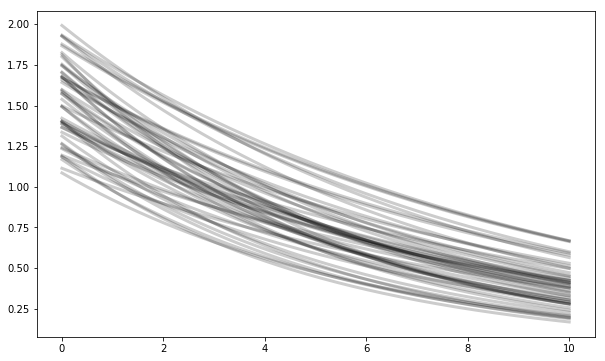

In [15]:
def foo(coord, param):
    return param[0] * numpy.e ** (-param[1] * coord)

coord = numpy.linspace(0, 10, 200)
distribution = cp.J(cp.Uniform(1, 2), cp.Uniform(0.1, 0.2))

samples = distribution.sample(50)
evals = numpy.array([foo(coord, sample) for sample in samples.T])

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
plt.plot(coord, evals.T, "k-", lw=3, alpha=0.2);
# plt.xlabel(r"\verb;coord;")
# plt.ylabel(r"function evaluations \verb;foo;")
# plt.savefig("demonstration.png")
# plt.clf()

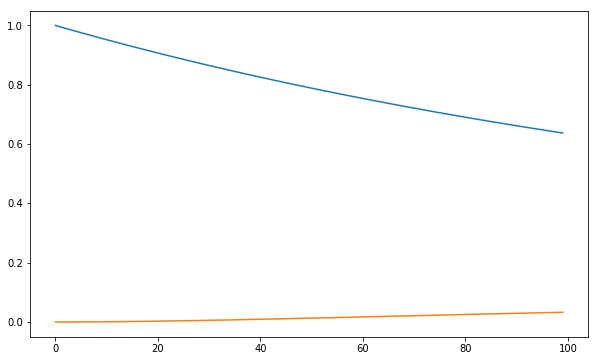

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
plt.plot(E)
plt.plot(Var)

In [24]:
# your code wrapper goes here
def foo(coord, param):
    return param[0] * np.e ** (-param[1] * coord)

coord = np.linspace(0, 10, 200)
# bi-variate probability distribution
distribution = cp.J(cp.Uniform(1, 2), cp.Uniform(0.1, 0.2))

samples = distribution.sample(50)
evals = [foo(coord, sample) for sample in samples.T]

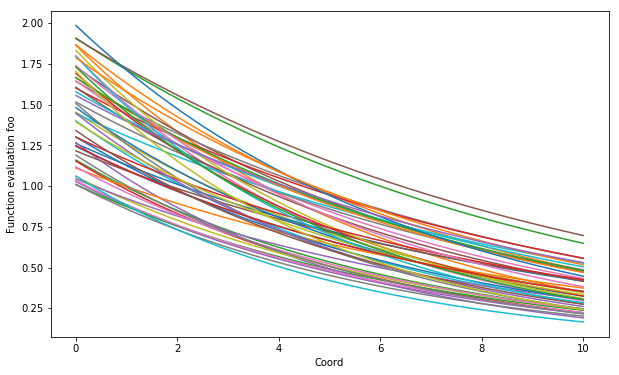

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
for i in range(50):
    plt.plot(coord, evals[i])
    ax.set_xlabel('Coord')
    ax.set_ylabel('Function evaluation foo')

## Monte Carlo simulation

In [60]:
samples = distribution.sample(1000, "H")
evals = [foo(coord, sample) for sample in samples.T]
expected = np.mean(evals, 0)
deviation = np.std(evals, 0)

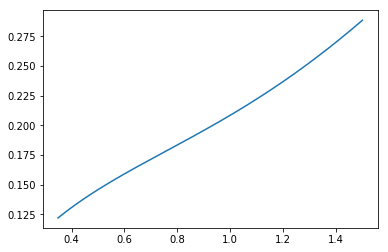

In [63]:
plt.plot(expected, deviation)

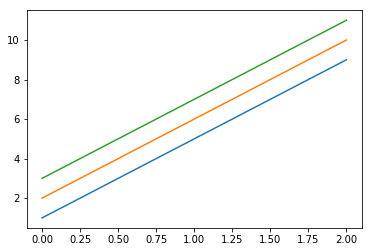

In [65]:
a = [[1,2,3],[5,6,7],[9,10,11]]
plt.plot(a)

In [8]:
"""Plot figures for tutorial."""
import chaospy as cp
import numpy
import matplotlib.pyplot as plt
import seaborn


def plot_figures():
    """Plot figures for tutorial."""
    numpy.random.seed(1000)


    def foo(coord, param):
        return param[0] * numpy.e ** (-param[1] * coord)

    coord = numpy.linspace(0, 10, 200)
    distribution = cp.J(cp.Uniform(1, 2), cp.Uniform(0.1, 0.2))

    samples = distribution.sample(50)
    evals = numpy.array([foo(coord, sample) for sample in samples.T])

    plt.plot(coord, evals.T, "k-", lw=3, alpha=0.2)
    plt.xlabel(r"\verb;coord;")
    plt.ylabel(r"function evaluations \verb;foo;")
    plt.savefig("demonstration.png")
    plt.clf()


    samples = distribution.sample(1000, "H")
    evals = [foo(coord, sample) for sample in samples.T]
    expected = numpy.mean(evals, 0)
    deviation = numpy.std(evals, 0)

    plt.fill_between(
        coord, expected-deviation, expected+deviation,
        color="k", alpha=0.3
    )
    plt.plot(coord, expected, "k--", lw=3)
    plt.xlabel(r"\verb;coord;")
    plt.ylabel(r"function evaluations \verb;foo;")
    plt.title("Results using Monte Carlo simulation")
    plt.savefig("results_montecarlo.png")
    plt.clf()


    polynomial_expansion = cp.orth_ttr(8, distribution)
    foo_approx = cp.fit_regression(polynomial_expansion, samples, evals)
    expected = cp.E(foo_approx, distribution)
    deviation = cp.Std(foo_approx, distribution)

    plt.fill_between(
        coord, expected-deviation, expected+deviation,
        color="k", alpha=0.3
    )
    plt.plot(coord, expected, "k--", lw=3)
    plt.xlabel(r"\verb;coord;")
    plt.ylabel(r"function evaluations \verb;foo;")
    plt.title("Results using point collocation method")
    plt.savefig("results_collocation.png")
    plt.clf()


    absissas, weights = cp.generate_quadrature(8, distribution, "C")
    evals = [foo(coord, val) for val in absissas.T]
    foo_approx = cp.fit_quadrature(polynomial_expansion, absissas, weights, evals)
    expected = cp.E(foo_approx, distribution)
    deviation = cp.Std(foo_approx, distribution)

    plt.fill_between(
        coord, expected-deviation, expected+deviation,
        color="k", alpha=0.3
    )
    plt.plot(coord, expected, "k--", lw=3)
    plt.xlabel(r"\verb;coord;")
    plt.ylabel(r"function evaluations \verb;foo;")
    plt.title("Results using psuedo-spectral projection method")
    plt.savefig("results_spectral.png")
    plt.clf()


if __name__ == "__main__":
    plot_figures()

<Figure size 432x288 with 0 Axes>